# **Cyclistic Case Study**

### About the Company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. - Google Data Amalytics Professional Certificate

### Services Offered:
- Single-Ride Passes
- Full-Day Passes
- Annual Memberships

### Customer Segment:
- Customers who purchase single-ride or full-day passes are referred to as casual riders.
- Customers who purchase annual memberships are Cyclistic members.

### Finance Analysts Speculation
- Annual members are much more profitable than casual riders.
- According to Moreno, the company's director of marketing, maximizing the number of annual members will be key to the company's future success.

### Notes from Moreno
- Rather than creating a marketing campaign that targets all-new customers, the company should focus on converting casual riders into annual members.
- Casual riders are already aware of the company's program and have chosen Cyclistic for their mobility needs.

# Case Study Deliverables:
- A clear statement of the business task
- A description of all data sources used
- Documentation of any cleaning or manipulation of data
- A summary of analysis
- Supporting visualizations and key findings
- Top 3 Recommendations based on analysis

# **Question to be Answered: How do annual members and casual riders use Cyclistic bikes differently?**

# **Ask Phase**

| **Guiding Questions**                         |              **Answers** |
|-------------------------------------------|:--------------------:|
| What is the problem I am trying to solve? |   Profit maximization for Cyclistic by turning casual riders into annual members   |
| How can my insights drive business decisions?      |  Understanding the difference between the riding patterns of Cyclistic's customer audience could potentially lead to actionable steps and drive marketing campaigns that easily converts casual riders into annual members |

### Deliverable: Concise and Clear Statement of the Business Task
**_Analyze and vary the bike usage patterns for both casual riders and annual members._** 

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**


# **Prepare Phase**

| **Guiding Questions**                         |              **Answers** |
|-------------------------------------------|:--------------------:|
| Where is the data located? |   The riding data has been provided by Motivate International Inc. and is stored on Amazon Web Service (AWS); a reputable cloud provider.   |
| How is the data organized?     | <ol><li> Comma Separated Files </li><li>Proper naming convention followed except for the case of September 2022</li><li>All data files have the same number of columns and all column names are exactly the same.</li><li>All columns are of the right data types.</li></ol> |
| Are there issues with bias or credibility in the data?     | <ol><li>The data being used for analysis is time-relevant as it is of the immediate past 12 months.</li><li>The data is from a primary source as it was collected in real-time by the company itself using their app.</li><li>There is not much information on how exactly the data were extracted. Hence, it is difficult to comment on whether there is bias in the data collection process.</li><li>The percentage of missing data in each dataframe is generally low, with most columns having a fraction of 0.0% indicating that the data is quite complete. However, columns like **_start\_station\_name_**, **_start\_station\_id_**,  **_end\_station\_name_**, **_end\_station\_id_** have percentages of their missing data ranging from about 13% to 17%. </li><li>The data entry format in some of the columns like **_station\_id_** is not uniform throughout.</li></ol> |
| How are components like licensing, privacy, security, and accessibility addressed?    |  <ol><li> The data is licensed under the Divvy company via this [link](https://www.divvybikes.com/data-license-agreement) but cannot be accessed because the server is down and hence, raises a concern. </li> <li> The data is opensource, hence publicly accessible to anyone that might require it. </li><li>Due to privacy issues, the riders' id information have been altered to protect against the possible connection between pass purchases and credit card numbers.</li><li>Copies of the original data files have been made for security purposes and the original files have been stored online using OneDrive.</li></ol> |

### Inspecting the Data

In [1]:
import pandas as pd

#### Loading all the Data

In [2]:
import os
# check current working directory
os.getcwd()

'c:\\Users\\Alli Ajagbe\\OneDrive - Plaksha University\\Desktop\\Data Analytics\\case_study'

In [3]:
june2023 = pd.read_csv("../../divvy-data/202306-divvy-tripdata.csv")
may2023 = pd.read_csv("../../divvy-data/202305-divvy-tripdata.csv")
april2023 = pd.read_csv("../../divvy-data/202304-divvy-tripdata.csv")
march2023 = pd.read_csv("../../divvy-data/202303-divvy-tripdata.csv")
february2023 = pd.read_csv("../../divvy-data/202302-divvy-tripdata.csv")
january2023 = pd.read_csv("../../divvy-data/202301-divvy-tripdata.csv")
december2022 = pd.read_csv("../../divvy-data/202212-divvy-tripdata.csv")
november2022 = pd.read_csv("../../divvy-data/202211-divvy-tripdata.csv")
october2022 = pd.read_csv("../../divvy-data/202210-divvy-tripdata.csv")
september2022 = pd.read_csv("../../divvy-data/202209-divvy-publictripdata.csv")
august2022 = pd.read_csv("../../divvy-data/202208-divvy-tripdata.csv")
july2022 = pd.read_csv("../../divvy-data/202207-divvy-tripdata.csv")

#### Columns Check

In [4]:
# asserting that all files have the same columns
all_dfs = [june2023, may2023, april2023, march2023, february2023, january2023, december2022, november2022, october2022, september2022, august2022, july2022]
df = all_dfs[0]
assert all([all(df.columns == df2.columns) for df2 in all_dfs])
print('All files have the same columns.')

All files have the same columns.


In [5]:
# printing the types of the columns
print(june2023.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


### Deliverable: A description of all data sources used.

**_The data sources used in this analysis consist of riding data provided by Motivate International Inc., a renowned bike-sharing services company. The data is securely stored on Amazon Web Service (AWS), a reputable and reliable cloud provider, ensuring accessibility and data integrity. The dataset is organized in comma-separated files with consistent naming conventions, except for September 2022. Each file contains the same number of columns with consistent names and appropriate data types, ensuring the data's coherence and structure. However, the analysis raises concerns about potential bias due to limited information on the data extraction process. On the positive side, the data represents the past 12 months and is collected in real-time through the company's app, bolstering its credibility and relevance. Nevertheless, the presence of missing values in the dataset may impact the accuracy of the resulting analysis. Additionally, privacy concerns have been addressed by altering riders' ID information to safeguard their identity and protect sensitive data. The data is licensed under Divvy, the bike-sharing company, and although the data is generally open-source, there are challenges related to its current accessibility due to server issues. For security purposes, copies of the original data files have been securely stored online using OneDrive._**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **Process Phase**

## Analysis Log
- Converted the started_at and ended_at columns to datetime for all the month dataframes
- Calculated ride length for each ride in all dataframes
- Added columns for days of the week for all dataframes
- Checked the missing values in the dataframes
- Computed the fraction of missing data points for all columns in all dataframes to assess the quality of the data
- Added month name columns to all dataframes
- Calculated distances in kilometres between the start and end stations for all dataframes using the haversine formula
- Renamed ride_length column to ride_length_seconds and ride_distance to ride_distance_km in all dataframes for easy understanding
- Merged all the monthly dataframes together into one dataframe (yearly_data)
- Removed outliers from the yearly_data dataframe using the IQR method
- Visualized all locations present in the data
- Verified that all locations are on land (and not in water)
- From the yearly_data without outliers, removed row where the total ride length is less than zero seconds

In [6]:
# converting started_at and ended_at to datetime for all dataframes
for dataframe in all_dfs:
    dataframe['started_at'] = pd.to_datetime(dataframe['started_at'])
    dataframe['ended_at'] = pd.to_datetime(dataframe['ended_at'])

In [7]:
# calculating ride length for each ride in all the dataframes
for dataframe in all_dfs:
    dataframe['ride_length'] = dataframe['ended_at'] - dataframe['started_at']
    # converting ride length to seconds
    dataframe['ride_length'] = dataframe['ride_length'].astype('timedelta64[s]')

In [8]:
# verifying our changes
june2023.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,6F1682AC40EB6F71,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,NaN,NaN,NaN,NaN,41.91,-87.69,41.91,-87.70,member,3464.0
1,622A1686D64948EB,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,NaN,NaN,NaN,NaN,41.94,-87.65,41.94,-87.65,member,164.0
2,3C88859D926253B4,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,NaN,NaN,NaN,NaN,41.95,-87.68,41.92,-87.63,member,976.0
3,EAD8A5E0259DEC88,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,NaN,NaN,NaN,NaN,41.99,-87.65,41.98,-87.66,member,275.0
4,5A36F21930D6A55C,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,NaN,NaN,NaN,NaN,41.98,-87.66,41.99,-87.65,member,222.0


In [9]:
# creating a column for day of the week
for dataframe in all_dfs:
    dataframe['day_of_week'] = dataframe['started_at'].dt.day_name()

In [10]:
# verifying our changes
may2023.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939408,-87.663831,41.930000,-87.650000,member,284.0,Sunday
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939482,-87.663848,41.940000,-87.690000,member,567.0,Saturday
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,NaN,NaN,41.853793,-87.646719,41.860000,-87.650000,member,255.0,Sunday
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member,771.0,Wednesday
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member,534.0,Tuesday


In [16]:
# checking the number of missing values in each column for all dataframes
i = 0
for dataframe in all_dfs:
    print(f"Dataframe {i}")
    for column in dataframe.columns:
        print(f"{column} : {dataframe[column].isnull().sum()}, fraction: {dataframe[column].isnull().sum()/len(dataframe[column])*100}%")
    print("\n")
    i += 1

Dataframe 0
ride_id : 0, fraction: 0.0%
rideable_type : 0, fraction: 0.0%
started_at : 0, fraction: 0.0%
ended_at : 0, fraction: 0.0%
start_station_name : 116259, fraction: 16.155654805744156%
start_station_id : 116259, fraction: 16.155654805744156%
end_station_name : 124050, fraction: 17.238312549158024%
end_station_id : 124050, fraction: 17.238312549158024%
start_lat : 0, fraction: 0.0%
start_lng : 0, fraction: 0.0%
end_lat : 889, fraction: 0.1235377658702256%
end_lng : 889, fraction: 0.1235377658702256%
member_casual : 0, fraction: 0.0%
ride_length : 0, fraction: 0.0%
day_of_week : 0, fraction: 0.0%


Dataframe 1
ride_id : 0, fraction: 0.0%
rideable_type : 0, fraction: 0.0%
started_at : 0, fraction: 0.0%
ended_at : 0, fraction: 0.0%
start_station_name : 89240, fraction: 14.754632316348312%
start_station_id : 89240, fraction: 14.754632316348312%
end_station_name : 95267, fraction: 15.751115608264843%
end_station_id : 95267, fraction: 15.751115608264843%
start_lat : 0, fraction: 0.0%


In [11]:
# creating a column for month name
for dataframe in all_dfs:
    dataframe['month'] = dataframe['started_at'].dt.month_name(locale = 'English')

In [12]:
# verifying the changes
may2023.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month
0,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939408,-87.663831,41.930000,-87.650000,member,284.0,Sunday,May
1,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939482,-87.663848,41.940000,-87.690000,member,567.0,Saturday,May
2,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,NaN,NaN,41.853793,-87.646719,41.860000,-87.650000,member,255.0,Sunday,May
3,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.894556,-87.653449,41.915983,-87.677335,member,771.0,Wednesday,May
4,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.957081,-87.664199,41.939478,-87.663748,member,534.0,Tuesday,May


In [27]:
!pip install haversine

  Using cached haversine-2.8.0-py2.py3-none-any.whl (7.7 kB)


In [28]:
# computing the distance
import math
def haversine_distance(row):

    # converting latitude and longitude from degrees into radians
    start_lan, start_lng, end_lat, end_lng = row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']

    # haversine formula
    d_lat = end_lat - start_lan
    d_lng = end_lng - start_lng

    a = math.sin(d_lat/2)**2 + math.cos(start_lan) * math.cos(end_lat) * math.sin(d_lng/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    # Radius of earth in kilometers is 6371
    r = 6371
    distance = r * c
    return distance


# formula seems incorrect 

# Using the haversine module provided by pypi.org to compute the distance
from haversine import haversine 

for dataframe in all_dfs:
    dataframe['ride_distance_km'] = dataframe.apply(lambda x: haversine((x['start_lat'], x['start_lng']), (x['end_lat'], x['end_lng'])), axis=1)

In [29]:
# verifying changes
april2023.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_seconds,day_of_week,month,ride_distance_km
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member,249.0,Sunday,April,1.111951
1,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member,1390.0,Wednesday,April,7.118743
2,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member,120.0,Wednesday,April,0.000000
3,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member,219.0,Wednesday,April,1.111951
4,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member,290.0,Wednesday,April,1.655016


In [30]:
# renaming the columns of all the dataframes
for dataframe in all_dfs:
    dataframe.rename(columns={'ride_length': 'ride_length_seconds', 'ride_distance': 'ride_distance_km'}, inplace=True)

In [31]:
# verifying changes
august2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_seconds,day_of_week,month,ride_distance_km
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual,451.0,Sunday,August,2.719290
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual,842.0,Monday,August,3.335852
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual,644.0,Monday,August,2.480190
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual,903.0,Monday,August,4.697742
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual,352.0,Sunday,August,1.386578


In [31]:
!pip install folium

                                              0.0/102.3 kB ? eta -:--:--
     -------------------------------------- 102.3/102.3 kB 3.0 MB/s eta 0:00:00


### Visualization the longitudes and latitudes of the stations

This is to verify that no starting or ending stations are in the ocean or in the middle of nowhere.

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

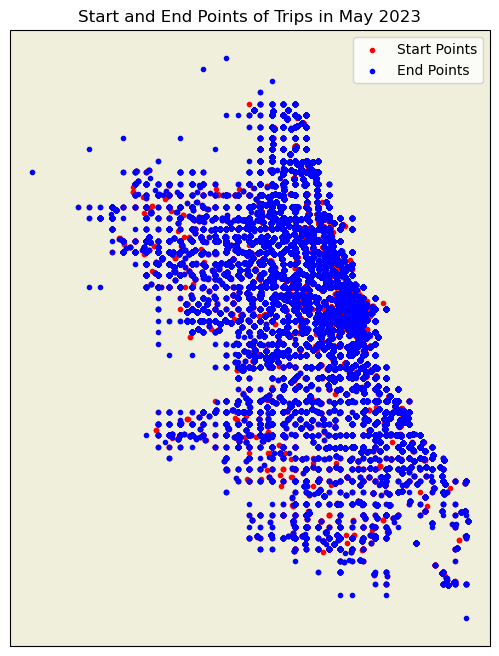

In [32]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
# adding land
ax.add_feature(cfeature.LAND)
# adding ocean
ax.add_feature(cfeature.OCEAN)

ax.scatter(may2023['start_lng'], may2023['start_lat'], marker = '.', label="Start Points", color='red', transform=ccrs.PlateCarree())
ax.scatter(may2023['end_lng'], may2023['end_lat'], marker = '.', label="End Points", color='blue', transform=ccrs.PlateCarree())

plt.legend()
plt.title('Start and End Points of Trips in May 2023')
plt.show()

In [33]:
# merging all the dataframes into one
yearly_data = pd.concat([june2023, may2023, april2023, march2023, february2023, january2023, december2022, november2022, october2022, september2022, august2022, july2022], ignore_index=True)

In [34]:
# Removing Distance Outliers from the dataset (Setting Threshold of 3 * Standard Deviation)
threshold = yearly_data["ride_distance_km"].mean() + 3 * yearly_data["ride_distance_km"].std()
outliers = yearly_data[yearly_data["ride_distance_km"] > threshold]
outliers

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_seconds,day_of_week,month,ride_distance_km
479024,873D50153BBC0686,electric_bike,2023-06-15 12:38:05,2023-06-15 12:38:41,OH Charging Stx - Test,OH Charging Stx - Test,OH Charging Stx - Test,OH Charging Stx - Test,41.863166,-87.679811,0.00,0.00,member,36.0,Thursday,June,9815.442314
488335,ADFF57D27B5BF9D2,classic_bike,2023-06-15 09:38:07,2023-06-15 09:42:57,State St & 54th St,646,OH Charging Stx - Test,OH Charging Stx - Test,41.796642,-87.625923,0.00,0.00,casual,290.0,Thursday,June,9810.776943
628151,500867C891161912,electric_bike,2023-06-15 01:33:07,2023-06-15 03:12:36,State St & Van Buren St,TA1305000035,NaN,NaN,41.877269,-87.627921,42.07,-88.16,casual,5969.0,Thursday,June,48.928866
2573302,3B47B333C0D186F0,classic_bike,2022-11-09 13:39:03,2022-11-09 13:44:38,Franklin St & Adams St (Temp),TA1309000008,Green St & Madison Ave*,chargingstx07,41.879434,-87.635504,0.00,0.00,member,335.0,Wednesday,November,9811.824347
2592922,42AF82C53D831251,electric_bike,2022-11-09 16:17:40,2022-11-09 16:38:06,Laflin St & Cullerton St,13307,Green St & Madison Ave*,chargingstx07,41.854916,-87.663692,0.00,0.00,casual,1226.0,Wednesday,November,9814.082961
2597755,BB8AA29838266294,classic_bike,2022-11-09 11:32:53,2022-11-09 11:37:30,Canal St & Adams St,13011,Green St & Madison Ave*,chargingstx07,41.879255,-87.639904,0.00,0.00,member,277.0,Wednesday,November,9812.187939
2815067,6AFE1471227BD76F,classic_bike,2022-11-09 16:17:16,2022-11-09 16:26:17,Morgan St & Polk St,TA1307000130,Green St & Madison Ave*,chargingstx07,41.871737,-87.651030,0.00,0.00,casual,541.0,Wednesday,November,9813.085840
2816142,E9495F1DC3475D41,classic_bike,2022-11-09 12:21:55,2022-11-09 12:26:18,Aberdeen St & Randolph St,18062,Green St & Madison Ave*,chargingstx07,41.884114,-87.654264,0.00,0.00,member,263.0,Wednesday,November,9813.391136
2816401,75DE33501313D0CE,classic_bike,2022-11-09 15:52:08,2022-11-09 15:52:23,Green St & Madison St,TA1307000120,Green St & Madison Ave*,chargingstx07,41.881892,-87.648789,0.00,0.00,member,15.0,Wednesday,November,9812.931291
2816583,0A6988FE859F4D54,classic_bike,2022-11-09 10:58:37,2022-11-09 11:06:21,LaSalle St & Jackson Blvd,TA1309000004,Green St & Madison Ave*,chargingstx07,41.878166,-87.631929,0.00,0.00,member,464.0,Wednesday,November,9811.524592


In [35]:
# checking what percentage of the data is comprised of outliers
print("Percentage of data that are outliers: ", (len(outliers) / len(yearly_data)) * 100)

Percentage of data that are outliers:  0.00019032972721943494


In [54]:
# getting the data points without the outliers
yearly_data_without_outliers = yearly_data[yearly_data['ride_distance_km'] <= threshold]

In [57]:
yearly_data_without_outliers.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length_seconds,ride_distance_km
count,5.773064e+06,5.773064e+06,5.773064e+06,5.773064e+06,5.773064e+06,5.773064e+06
mean,4.190290e+01,-8.764770e+01,4.190316e+01,-8.764788e+01,9.197022e+02,2.099220e+00
std,4.547700e-02,2.819367e-02,4.564512e-02,2.833112e-02,2.024679e+03,1.903866e+00
min,4.164000e+01,-8.787000e+01,4.155000e+01,-8.811000e+01,1.000000e+00,0.000000e+00
25%,4.188103e+01,-8.766130e+01,4.188103e+01,-8.766150e+01,3.300000e+02,8.653137e-01
50%,4.190000e+01,-8.764414e+01,4.190000e+01,-8.764434e+01,5.820000e+02,1.548984e+00
75%,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01,1.037000e+03,2.751181e+00
max,4.207000e+01,-8.752000e+01,4.237000e+01,-8.730000e+01,1.922127e+06,3.767875e+01


In [58]:
# removing the entry with a negative ride_length_seconds
yearly_data_without_outliers = yearly_data_without_outliers[yearly_data_without_outliers['ride_length_seconds'] > 0]

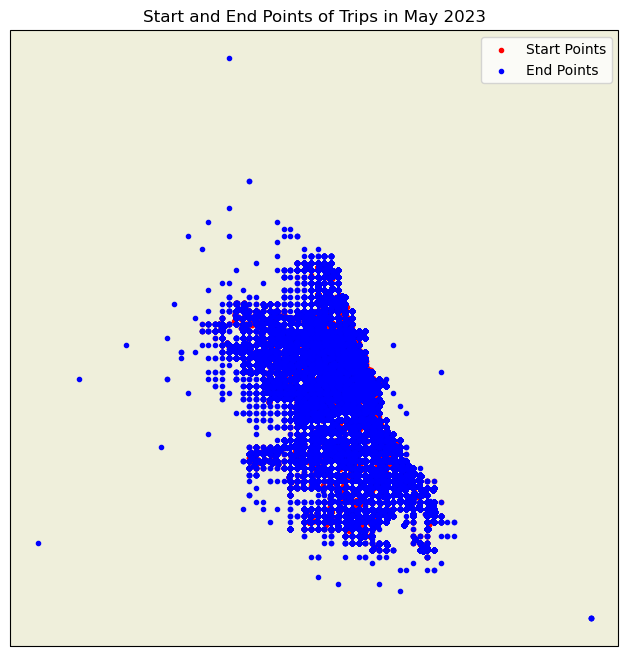

In [59]:
# visualizing for all the 12 months.
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
# adding land
ax.add_feature(cfeature.LAND)
# adding ocean
ax.add_feature(cfeature.OCEAN)

ax.scatter(yearly_data_without_outliers['start_lng'], yearly_data_without_outliers['start_lat'], marker = '.', label="Start Points", color='red', transform=ccrs.PlateCarree())
ax.scatter(yearly_data_without_outliers['end_lng'], yearly_data_without_outliers['end_lat'], marker = '.', label="End Points", color='blue', transform=ccrs.PlateCarree())

plt.legend()
plt.title('Start and End Points of Trips in May 2023')
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **Analyze Phase**

### **Descriptive Analysis**

#### Numeric Columns

In [60]:
# fetching all numeric columns from the dataset
numeric_columns = yearly_data_without_outliers.select_dtypes(include=['int64','float64']).columns
yearly_data_without_outliers[numeric_columns].describe()

,start_lat,start_lng,end_lat,end_lng,ride_length_seconds,ride_distance_km
count,5.773064e+06,5.773064e+06,5.773064e+06,5.773064e+06,5.773064e+06,5.773064e+06
mean,4.190290e+01,-8.764770e+01,4.190316e+01,-8.764788e+01,9.197022e+02,2.099220e+00
std,4.547700e-02,2.819367e-02,4.564512e-02,2.833112e-02,2.024679e+03,1.903866e+00
min,4.164000e+01,-8.787000e+01,4.155000e+01,-8.811000e+01,1.000000e+00,0.000000e+00
25%,4.188103e+01,-8.766130e+01,4.188103e+01,-8.766150e+01,3.300000e+02,8.653137e-01
50%,4.190000e+01,-8.764414e+01,4.190000e+01,-8.764434e+01,5.820000e+02,1.548984e+00
75%,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01,1.037000e+03,2.751181e+00
max,4.207000e+01,-8.752000e+01,4.237000e+01,-8.730000e+01,1.922127e+06,3.767875e+01


**_From the summary above, we can see that the cleaned dataset has about 5.77 million entries. Notably, the standard deviations are all relatively small, indicating consistency in the data. The mean and median values are also relatively close for all the attributes in the descriptive analysis. The shortest ride length is 1 second, which seems impossible and requires a more indepth look. The average ride length for all rides irrespective of client type is 919.7 seconds which is about 15 minutes. The maximum ride length is 1,922,127 seconds (about 32,035 minutes (equivalent to 533 hours) or (22 days)). This does not seem right. However, there's not much information regarding the maximum time a client could use a ride for. Compared to the mean, it is significantly different. Hence, this suggests that this might be a technical error in the data collection stage. With this quick summary, we can see the central tendencies, variablility, and potential anomalies, which help us get a better understanding of the dataset we are working with._**

In [62]:
yearly_data_without_outliers.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length_seconds', 'day_of_week', 'month',
       'ride_distance_km'],
      dtype='object')

In [65]:
# getting the mode of the day of week 
mode_day_of_week = yearly_data_without_outliers['day_of_week'].mode()[0]
mode_day_of_week

'Saturday'

**_All year round, the mode of the week is Saturday meaning that there are more rides on Saturdays as compared to other days of the week._**

In [67]:
# calculating the average ride length for members and casual riders
members = yearly_data_without_outliers[yearly_data_without_outliers['member_casual'] == 'member']
casual = yearly_data_without_outliers[yearly_data_without_outliers['member_casual'] == 'casual']

print('Average ride length for members: ', members['ride_length_seconds'].mean())
print('Average ride length for casual riders: ', casual['ride_length_seconds'].mean())

Average ride length for members:  723.8511435272653
Average ride length for casual riders:  1228.8460339756716


**_On average, we can see the casual riders make use of the service more than annual members._**

In [73]:
# calculating the average ride length for users by day of the week and type of riders

# getting the mean of all days of the week
avg_ride_length_grouped = yearly_data_without_outliers.groupby(['day_of_week','member_casual'])['ride_length_seconds'].mean().reset_index()
avg_ride_length_grouped

,day_of_week,member_casual,ride_length_seconds
0,Friday,casual,1186.331782
1,Friday,member,717.839462
2,Monday,casual,1224.644033
3,Monday,member,690.156673
4,Saturday,casual,1400.819394
5,Saturday,member,812.007593
6,Sunday,casual,1410.194664
7,Sunday,member,799.499149
8,Thursday,casual,1080.241598
9,Thursday,member,696.880484


In [74]:
# pivoting the avg_ride_length_grouped
pivot_avg_ride_length_grouped = avg_ride_length_grouped.pivot(index='day_of_week', columns='member_casual', values='ride_length_seconds')
pivot_avg_ride_length_grouped

member_casual,casual,member
day_of_week,,
Friday,1186.331782,717.839462
Monday,1224.644033,690.156673
Saturday,1400.819394,812.007593
Sunday,1410.194664,799.499149
Thursday,1080.241598,696.880484
Tuesday,1088.923709,689.936006
Wednesday,1060.736017,693.778071


**_Backing up our earlier comparison between both rider types, the total number of counts for casual riders on all days of the week surpass that of the annual members._**

In [75]:
# getting the number of rides for users by day of week
casual_riders = casual['ride_id'].groupby(casual['day_of_week']).count()
casual_riders

day_of_week
Friday       346279
Monday       252512
Saturday     458755
Sunday       350419
Thursday     297701
Tuesday      256570
Wednesday    276719
Name: ride_id, dtype: int64

In [76]:
member_riders = members['ride_id'].groupby(members['day_of_week']).count()
member_riders

day_of_week
Friday       518711
Monday       477503
Saturday     464221
Sunday       387808
Thursday     565524
Tuesday      548861
Wednesday    571481
Name: ride_id, dtype: int64

In [80]:
# getting the distributions of ridetype for both rider types
members_ridetype = members['rideable_type'].value_counts()
members_ridetype

electric_bike    1843987
classic_bike     1690122
Name: rideable_type, dtype: int64

In [81]:
casual_ridetype = casual['rideable_type'].value_counts()
casual_ridetype

electric_bike    1298134
classic_bike      801967
docked_bike       138854
Name: rideable_type, dtype: int64

**_From the above comparison, we see that electric bike is mostly popular across the two rider groups. Annual members however do not make use of docked bikes. On another note, annual members use more of electric bikes and classic bikes compared to their casual counterparts._**

## Deliverable: A Summary Report

**_The descriptive analysis of the cleaned dataset, encompassing around 5.77 million entries, underscores the dataset's coherence, as evidenced by the relatively small standard deviations across attributes. Mean and median values, presenting closeness, further attest to data consistency. A glaring outlier surfaces in the form of the shortest ride length at 1 second, warranting closer scrutiny. The overall average ride length, regardless of user type, is approximately 919.7 seconds or 15 minutes, while an anomaly emerges with a maximum ride length of 1,922,127 seconds (around 22 days). This discrepancy suggests potential data collection issues. The mode day of the week is Saturday. Notably, the average ride lengths for casual and member riders are 1228.85 seconds and 723.85 seconds, respectively. Detailed breakdowns by day of the week reveal valuable insights into ride behaviors, with Saturday being the most popular day. Moreover, categorized by ride type, electric bikes dominate both member and casual ridership, highlighting notable usage trends within the dataset._**

# **Visualizations**

In [86]:
!pip install kaleido

                                              0.0/65.9 MB ? eta -:--:--
                                             0.0/65.9 MB 640.0 kB/s eta 0:01:43
                                             0.0/65.9 MB 487.6 kB/s eta 0:02:16
                                             0.1/65.9 MB 819.2 kB/s eta 0:01:21
                                              0.2/65.9 MB 1.1 MB/s eta 0:01:02
                                              0.3/65.9 MB 1.2 MB/s eta 0:00:55
                                              0.4/65.9 MB 1.4 MB/s eta 0:00:48
                                              0.6/65.9 MB 1.7 MB/s eta 0:00:38
                                              0.8/65.9 MB 2.1 MB/s eta 0:00:31
                                              1.2/65.9 MB 2.9 MB/s eta 0:00:22
     -                                        1.7/65.9 MB 3.7 MB/s eta 0:00:18
     -                                        2.0/65.9 MB 3.9 MB/s eta 0:00:17
     -                                        2.4/65.9 M

In [91]:
# visualizing the day of the week
import plotly as py
import plotly.graph_objs as go
import plotly.offline as pyo

# create a dataframe with the day of the week and the number of trips
days_df = yearly_data_without_outliers.groupby('day_of_week').size().reset_index(name='number_of_trips')

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

days_df['day_of_week'] = pd.Categorical(days_df['day_of_week'], categories=days_order, ordered=True)
days_df = days_df.sort_values('day_of_week')

# create a bar chart
data = [go.Bar(
            x=days_df['day_of_week'],
            y=days_df['number_of_trips']
    )]
fig = go.Figure(data=data)

# add title and axis labels
fig.update_layout(
    title="Number of trips per day of the week",
    xaxis_title="Day of the week",
    yaxis_title="Number of trips",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#b92c00"
    )
)

# show the plot
pyo.iplot(fig)